In [26]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
reload(sa)
reload(sc)

<module 'neuraltda.simpComp' from '/home/brad/code/NeuralTDA/neuraltda/simpComp.pyc'>

In [33]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'

blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site16_Z2865__B604_cat_P01_S16_1/'
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#Load simplicial chain generator dictionary
scgfss = glob.glob(os.path.join(blockPath, 'scg/*.scg'))
print(scgfss)

['/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170407T230137Z-10.0-5.0-13.0-correct.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170410T215549Z-10.0-5.0-13.0-incorrect.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170322T165428Z-10.0-5.0-13.0.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170412T224036Z-10.0-5.0-13.0-SampleDistractor.scg']


In [34]:
scgfs = scgfss[-1]
print(scgfs)
with open(scgfs, 'r') as scgf:
    scg = pickle.load(scgf)

/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170412T224036Z-10.0-5.0-13.0-SampleDistractor.scg


In [35]:
scg.keys()

[u'T40S40D3',
 u'T3S8D40',
 u'T3S3D-1',
 u'T40S70D-1',
 u'T3S3D40',
 u'T40S70D3',
 u'T3S8D-1',
 u'T40S40D-1']

In [36]:
stims = [s for s in scg.keys() if s[0] =='T']
stimtrials = [(s, t) for s in scg.keys() for t in range(20)]
stimtrials = [(s, t) for s in stims for t in range(5)]
stimtrials
labs = [str(s[0])+ str(s[1]) for s in stimtrials]

In [ ]:
stimtrials = [(s, t) for s in ['T40S40D3', 'T40S70D3', 'T-1S-1D40'] for t in range(10)]
#stimtrials = [(s, t) for s in scg.keys() for t in range(5)]

In [37]:
print(stimtrials)

[(u'T40S40D3', 0), (u'T40S40D3', 1), (u'T40S40D3', 2), (u'T40S40D3', 3), (u'T40S40D3', 4), (u'T3S8D40', 0), (u'T3S8D40', 1), (u'T3S8D40', 2), (u'T3S8D40', 3), (u'T3S8D40', 4), (u'T3S3D-1', 0), (u'T3S3D-1', 1), (u'T3S3D-1', 2), (u'T3S3D-1', 3), (u'T3S3D-1', 4), (u'T40S70D-1', 0), (u'T40S70D-1', 1), (u'T40S70D-1', 2), (u'T40S70D-1', 3), (u'T40S70D-1', 4), (u'T3S3D40', 0), (u'T3S3D40', 1), (u'T3S3D40', 2), (u'T3S3D40', 3), (u'T3S3D40', 4), (u'T40S70D3', 0), (u'T40S70D3', 1), (u'T40S70D3', 2), (u'T40S70D3', 3), (u'T40S70D3', 4), (u'T3S8D-1', 0), (u'T3S8D-1', 1), (u'T3S8D-1', 2), (u'T3S8D-1', 3), (u'T3S8D-1', 4), (u'T40S40D-1', 0), (u'T40S40D-1', 1), (u'T40S40D-1', 2), (u'T40S40D-1', 3), (u'T40S40D-1', 4)]


In [38]:
beta = 0.15
divsave = []
d = 1
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        mE = sc.maxEnt(scgTot, d)
        
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[2]

mat = mat + mat.T
pickle.dump(mat, open('B604_P01S15_Lap1_0.15_dmat_AllStims_5Trials_SampleDistractor.pkl', 'w'))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
len(divsave)

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in divide
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in divide


([<matplotlib.axis.YTick at 0x7fe34945e090>,
 <a list of 8 Text yticklabel objects>)

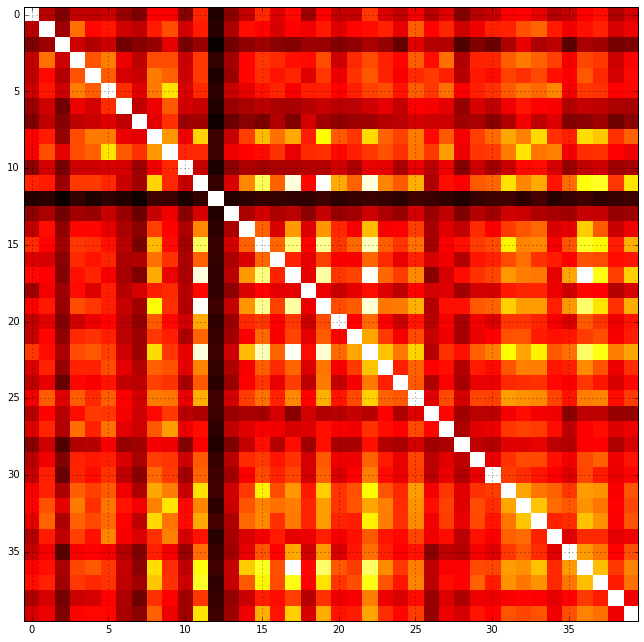

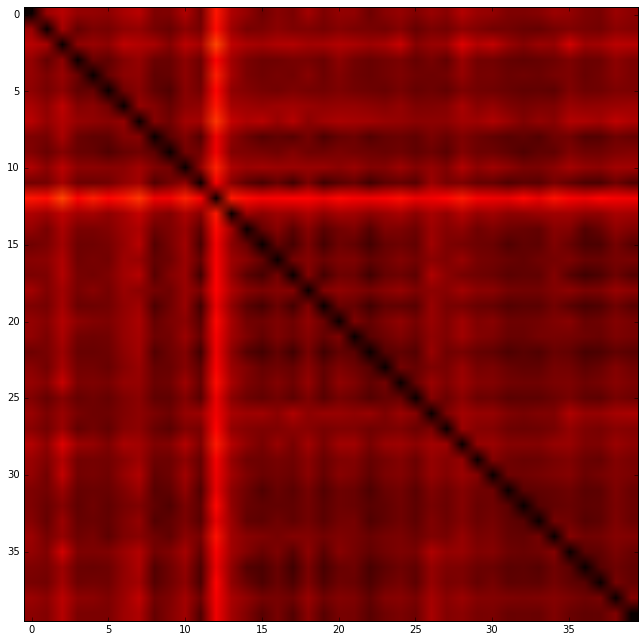

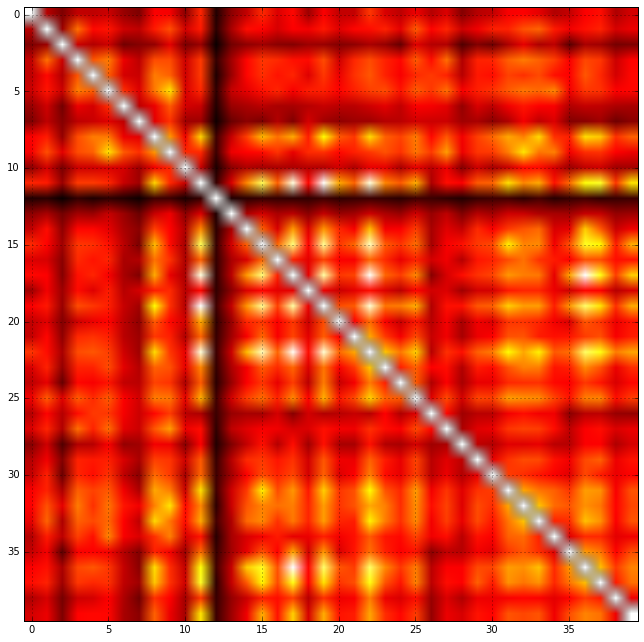

In [39]:


mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[2]

mat = mat + mat.T
#pickle.dump(mat, open('B604_P01S15_Lap1_0.15_dmat.pkl', 'w'))
import matplotlib.pyplot as plt
%matplotlib inline
ntrials = 5
plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials), ntrials))
#plt.savefig('/Users/brad/B1235_P02S01_1LaplacianComparison.pdf', format='pdf')
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), 5))
plt.yticks(np.arange(0, len(stimtrials),5))

In [2]:
mat = pickle.load(open('B604_P01S15_Lap1_0.15_dmat_AllStims_10Trials.pkl', 'r'))

In [41]:
noNANmat = np.copy(mat)
noNANmat[np.isnan(noNANmat)] = 0

In [18]:
from scipy.cluster import hierarchy as ha

stimlabels = [str(s[0]) for s in stimtrials]
print(stimlabels)
# First define the leaf label function.
n = len(stimtrials)
def llf(id):
    if id < n:
        return stimlabels[id]
    else:
        return '[%d]' % (id)
    
print(set(stimlabels))

['T40S40D3', 'T40S40D3', 'T40S40D3', 'T40S40D3', 'T40S40D3', 'T3S8D40', 'T3S8D40', 'T3S8D40', 'T3S8D40', 'T3S8D40', 'T3S3D-1', 'T3S3D-1', 'T3S3D-1', 'T3S3D-1', 'T3S3D-1', 'T40S70D-1', 'T40S70D-1', 'T40S70D-1', 'T40S70D-1', 'T40S70D-1', 'T3S3D40', 'T3S3D40', 'T3S3D40', 'T3S3D40', 'T3S3D40', 'T40S70D3', 'T40S70D3', 'T40S70D3', 'T40S70D3', 'T40S70D3', 'T3S8D-1', 'T3S8D-1', 'T3S8D-1', 'T3S8D-1', 'T3S8D-1', 'T40S40D-1', 'T40S40D-1', 'T40S40D-1', 'T40S40D-1', 'T40S40D-1']
set(['T40S40D3', 'T3S8D40', 'T3S3D-1', 'T40S70D-1', 'T3S3D40', 'T40S70D3', 'T3S8D-1', 'T40S40D-1'])


In [9]:
linmat = mat[np.triu_indices(len(stimtrials))]
Z = ha.linkage(linmat, method='complete')
# calculate full dendrogram
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ha.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
    leaf_label_func=llf
)
plt.show()

ValueError: The condensed distance matrix must contain only finite values.

In [37]:
idx1

[5, 3, 8, 9, 1, 7, 0, 2, 4, 6]

In [22]:
# average the distance over trials?
dmat2 = np.zeros((ntrials, ntrials))
for stim in range(ntrials):
    for stim2 in range(10):
        lm0 = stim*ntrials
        lm1 = stim*ntrials +ntrials
        lm2 = stim2*ntrials
        lm3 = stim2*ntrials + ntrials
        dmat2[stim, stim2] = np.mean(noNANmat[lm0:lm1, lm2:lm3])

def llf(x):
    if x < ntrials:
        return list(set(stimlabels))[x]
    else:
        return '[%d]' % (x)

IndexError: index 5 is out of bounds for axis 1 with size 5

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


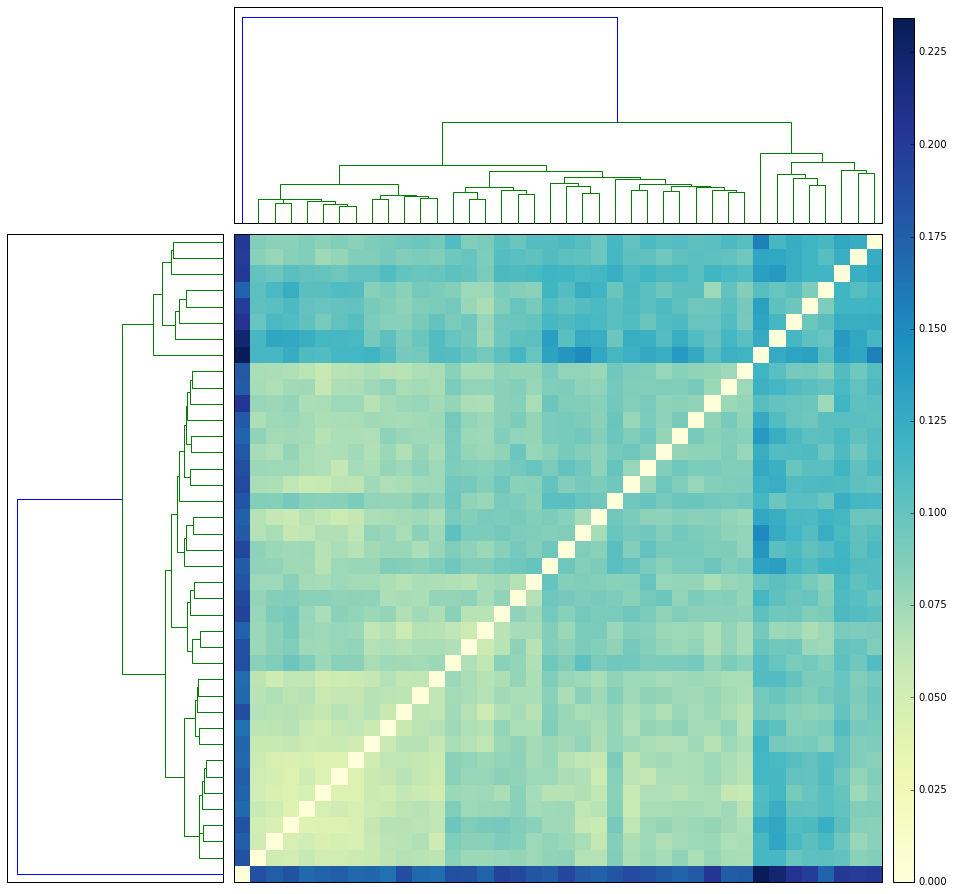

In [42]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate features and distance matrix.
D = dmat2
D = noNANmat
method = 'complete'
# Compute and plot dendrogram.
fig = pylab.figure(figsize=(15,15))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method=method)
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])


#Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method=method)
Z2 = sch.dendrogram(Y,leaf_rotation=90., leaf_font_size=18.,leaf_label_func=llf)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.imshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu, interpolation='nearest')
axmatrix.set_xticks([])
axmatrix.set_yticks([])
#plt.xticks(range(len(stimlabels)),np.array(list(set(stimlabels)))[idx1])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
plt.colorbar(im, cax=axcolor)

# Display and save figure.
fig.show()
fig.savefig('/home/brad/B604_P01S15_Lap1_AllStims_SampleDistractor.png')

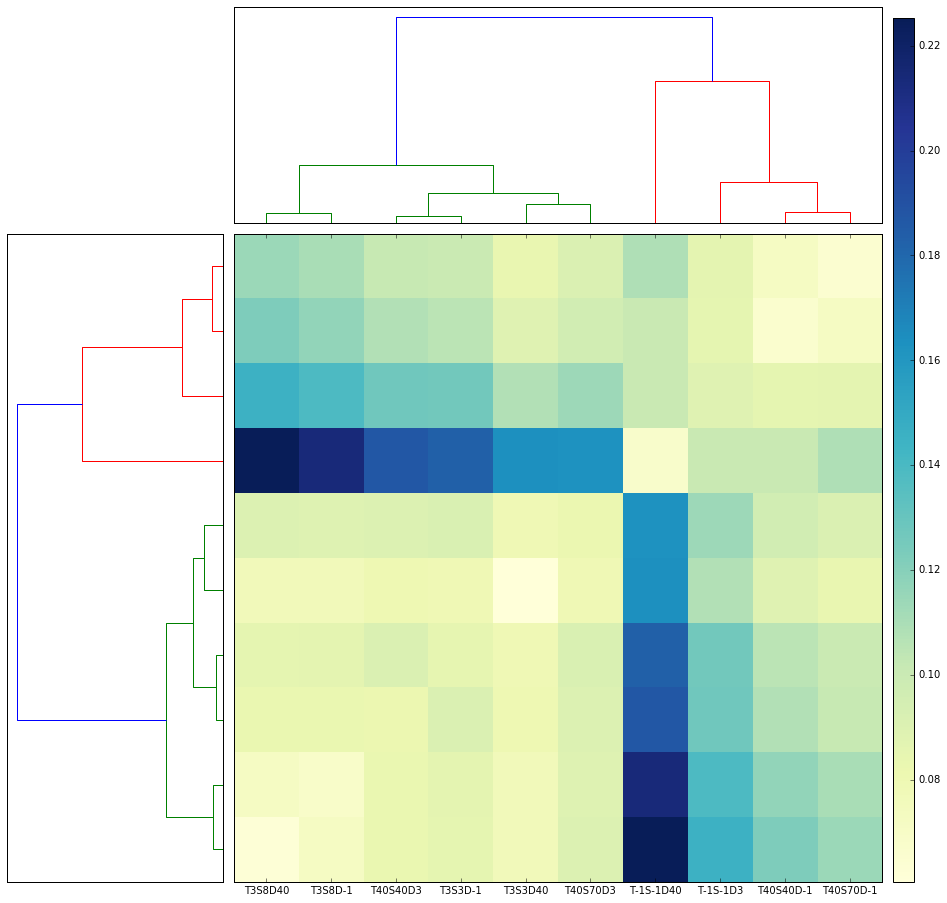

In [41]:
# Generate features and distance matrix.
D = dmat2
#D = noNANmat
method = 'ward'
# Compute and plot dendrogram.
fig = pylab.figure(figsize=(15,15))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method=method)
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])


#Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method=method)
Z2 = sch.dendrogram(Y,leaf_rotation=90., leaf_font_size=18.,leaf_label_func=llf)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.imshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu, interpolation='nearest')
axmatrix.set_xticks([])
axmatrix.set_yticks([])
plt.xticks(range(10),np.array(list(set(stimlabels)))[idx1])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
plt.colorbar(im, cax=axcolor)

# Display and save figure.
fig.show()
#fig.savefig('/home/brad/B604_P01S15_Lap1_AllStims_Avg10Trials_dendrogram.png')

In [ ]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [ ]:
r = np.diag(np.sqrt(np.dot(pts, pts.T)))
theta = np.arctan2(pts[:, 1], pts[:, 0])


In [ ]:
lr = np.log(r)
ptsx = lr*np.cos(theta)
ptsy = lr*np.sin(theta)

In [ ]:
plt.plot(ptsx, ptsy, '.', pts[:, 0], pts[:, 1], 'r.')

In [ ]:
from scipy.cluster import hierarchy as ha

linmat = mat[np.triu_indices(len(stimtrials))]
z = ha.linkage(linmat)

In [ ]:
divsavefile = './B1235_P02S01_divsave.pkl'
with open(divsavefile, 'w') as f:
    pickle.dump(divsave, f)

In [ ]:
scgTot

In [ ]:
E = sc.simplicialChainGroups([(1,2,3)])
(t, basis) = sc.stimSpaceGraph(E, sc.boundaryOperatorMatrix(E))
print(t)
print(basis)

In [ ]:
gms = sc.adjacency2maxsimp(t)

Egraph = sc.simplicialChainGroups(gms)
Dgraph = sc.boundaryOperatorMatrix(Egraph)
print(Dgraph)
print(Egraph)
sc.laplacian(sc.boundaryOperatorMatrix(Egraph), 0)

In [ ]:
sc.graphLaplacian(t)

In [ ]:
np.dot(Dgraph[1], Dgraph[1].T)
np.dot(Dgraph[0].T, Dgraph[0])

In [ ]:
(t, basis) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
print(t)
print(basis)
gms = sc.adjacency2maxsimp(t)

Egraph = sc.simplicialChainGroups(gms)
Dgraph = sc.boundaryOperatorMatrix(Egraph)
print(Dgraph)
print(Egraph)
sc.laplacian(sc.boundaryOperatorMatrix(Egraph), 0)

In [ ]:
ntrials = 5
stimtrials = [(s, t) for s in scg.keys() for t in range(20)]
stimtrials = [(s, t) for s in scg.keys()[0:2] for t in range(ntrials)]
stimtrials

In [ ]:
s1 = sc.simplicialChainGroups([(1,2,3)])
s2 = sc.simplicialChainGroups([(4,5,6)])
stimtrials = (s1, s2)


In [ ]:
beta = 1
divsave = []
d = 0
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        (adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
        (adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
        (adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
        EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
        Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
        Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
        D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
        D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
        
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
#plt.clim(0, 0.5)



In [ ]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [ ]:
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,100, 10))

In [ ]:
scg1 = sc.simplicialChainGroups([(1,2,3)])
scg2 = sc.simplicialChainGroups([(4,5,6)])
scgTot = sc.simplexUnion(scg1, scg2)
(adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
(adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
(adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
print(D1)
print(D2)

In [ ]:
s1 = sc.simplicialChainGroups([(1,2,3)])
s2 = sc.simplicialChainGroups([(4,5,6)])
stimtrials = []

ntrials = 5
for ind in range(ntrials):
    n = np.random.rand(15, 200)
    n = (n > 0.9).astype(int)
    maxSimpList = sorted(sc.binarytomaxsimplex(n, rDup=True))
    E = sc.simplicialChainGroups(maxSimpList)
    stimtrials.append(E)

beta = 1
divsave = []
d = 0
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        #stim1 = stimtrials[ind][0]
        #t1 = stimtrials[ind][1]
        #stim2 = stimtrials[ind2][0]
        #t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        #scg1 = scg[stim1][t1]
        #scg2 = scg[stim2][t2]
        stim1 = ind
        stim2 = ind2
        t1 = stim1
        t2 = stim2
        scg1 = stimtrials[ind]
        scg2 = stimtrials[ind2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        (adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
        (adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
        (adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
        EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
        Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
        Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
        D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
        D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
 

In [ ]:
       
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :], interpolation='none')
plt.clim(0, 0.5)

In [ ]:
ds = mat[np.triu_indices(len(stimtrials))]

In [ ]:
dontcare = plt.hist(ds, bins=100)

In [ ]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [ ]:
stimSimplexes = []
for stim in scg.keys():
    stimTotalSimplex = [[]]
    stimData = scg[stim]
    for trial in stimData.keys():
        #print((stim, trial))
        trialData = stimData[trial]
        stimTotalSimplex = sc.simplexUnion(stimTotalSimplex, trialData)
    stimSimplexes.append((stim, stimTotalSimplex))

beta = 0.25
divsave = []
d = 0
for ind in range(len(stimSimplexes)):
    print(ind)
    for ind2 in range(ind, len(stimSimplexes)):
        
        stim1 = stimSimplexes[ind][0]
        stim2 = stimSimplexes[ind2][0]
        scg1 = stimSimplexes[ind][1]
        scg2 = stimSimplexes[ind2][1]
        scgTot = sc.simplexUnion(scg1, scg2)
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, stim2), div))

In [ ]:
mat = np.zeros((len(stimSimplexes), len(stimSimplexes)))
iu1 = np.triu_indices(len(stimSimplexes))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[1]

mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimSimplexes), 1))
plt.yticks(np.arange(0, len(stimSimplexes),1))
plt.savefig('/Users/brad/B1235_P02S01_0LaplacianComparisonAllTrialsUnion.pdf', format='pdf')
#plt.clim(vmin=3)

In [ ]:
for ind, stim in enumerate(scg.keys()):
    print((ind, stim))

In [ ]:
beta = 0.25
divsave = []
d = 1
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        mE = sc.maxEnt(scgTot, d)
        
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        divtot = 0
        for d in range(3):
            
            try:
                L1 = sc.laplacian(D1, d)
                L2 = sc.laplacian(D2, d)
        
                rho1 = sc.densityMatrix(L1, beta)
                rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
                div = sc.JSdivergence(rho1, rho2)
                divtot = divtot + div
            except:
                divtot = divtot+0
            
        divsave.append(((stim1, t1), (stim2, t2), divtot))

In [ ]:
d = 2

mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[2]

mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), 5))
plt.yticks(np.arange(0, len(stimtrials),5))
#plt.savefig('/Users/brad/B1235_P02S01_1LaplacianComparison.pdf', format='pdf')
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,100, 10))

In [43]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'

blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site16_Z2865__B604_cat_P01_S16_1/'
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#Load simplicial chain generator dictionary
scgfss = glob.glob(os.path.join(blockPath, 'scg/*.scg'))
print(scgfss)

['/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170407T230137Z-10.0-5.0-13.0-correct.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170410T215549Z-10.0-5.0-13.0-incorrect.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170322T165428Z-10.0-5.0-13.0.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170412T224036Z-10.0-5.0-13.0-SampleDistractor.scg']


In [46]:
scgf1 = scgfss[2]
scgf2 = scgfss[3]
print(scg1)
print(scg2)

/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170322T165428Z-10.0-5.0-13.0.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170412T224036Z-10.0-5.0-13.0-SampleDistractor.scg


In [51]:
with open(scgf1, 'r') as scgf:
    scg1e = pickle.load(scgf)
    
with open(scgf2, 'r') as scgf:
    scg2e = pickle.load(scgf)

In [49]:
print scg1.keys()

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T-1S-1D3', u'T3S3D40', u'T-1S-1D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1', u'T40S70D-1']


In [50]:
print scg2.keys()

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']


In [87]:
indiv = ['T-1S-1D3', 'T-1S-1D40']
SD = ['T3S3D40', 'T40S40D3']
indiv2 = ['T3S3D-1','T40S40D-1' ]
attn = {'T3S3D40':'Low', 'T40S40D3':'High'}
targ = {'T-1S-1D3': 'Low', 'T-1S-1D40':'High'}
t2 = {'T40S40D-1': 'High', 'T3S3D-1': 'Low'}

In [82]:
import pandas as pd
dat = pd.DataFrame(columns=['Distance', 'Attention', 'Target'])
beta = 0.15
divsave = []
d = 1
ntrials = 10
stim1 = indiv[1]
stim2 = SD[1]
divsave = []
divsave2 = []
for stim1 in indiv:
    for stim2 in SD:
        
        mat = np.zeros((ntrials, ntrials))
        for ind in range(ntrials):
            print(ind)
            for ind2 in range(ntrials):

                #print(stim1, t1, stim2, t2)
                scgA = scg1e[stim1][ind]
                scgB = scg2e[stim2][ind2]
        
                scgTot = sc.simplexUnion(scgA, scgB)
                mE = sc.maxEnt(scgTot, d)
        
                D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scgA)
                D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scgB)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
                L1 = sc.laplacian(D1, d)
                L2 = sc.laplacian(D2, d)
        
                rho1 = sc.densityMatrix(L1, beta)
                rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
                div = sc.JSdivergence(rho1, rho2)
                divsave.append([div, targ[stim1], attn[stim2]])
                divsave2.append([1.0/div, targ[stim1], attn[stim2]])
                mat[ind, ind2] = div
        print([stim1, stim2, np.mean(mat)])
   

0
1
2
3
4
5
6
7
8
9
['T-1S-1D3', 'T3S3D40', 0.093686117427119978]
0
1
2
3
4
5
6
7
8
9
['T-1S-1D3', 'T40S40D3', 0.10623267664453274]
0
1
2
3
4
5
6
7
8
9
['T-1S-1D40', 'T3S3D40', 0.079178586191725145]
0
1
2
3
4
5
6
7
8
9
['T-1S-1D40', 'T40S40D3', 0.11348485849173745]


In [83]:
             
dat = pd.DataFrame(data = divsave, columns=['Distance', 'Sample', 'Attention'])
dat2 = pd.DataFrame(data = divsave2, columns=['Distance', 'Sample', 'Attention'])

meanmat = np.mean(mat)
stdmat = np.std(mat)
print(meanmat)
print(stdmat)

0.113484858492
0.0281310628626


In [76]:
dat

,Distance,Target,Attention
0,0.155569,Low,Low
1,0.164465,Low,Low
2,0.145056,Low,Low
3,0.142060,Low,Low
4,0.154445,Low,Low
5,0.135268,Low,Low
6,0.144818,Low,Low
7,0.164975,Low,Low
8,0.156332,Low,Low
9,0.142439,Low,Low


In [56]:
stdmat

0.028748511605702846

In [64]:
import seaborn as sns

In [65]:
ex = sns.load_dataset('exercise')

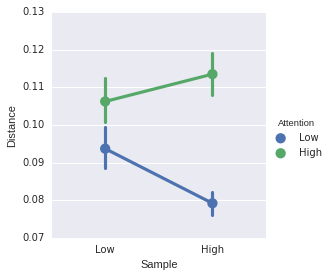

In [84]:
g = sns.factorplot(x="Sample", y="Distance", hue="Attention", data=dat)

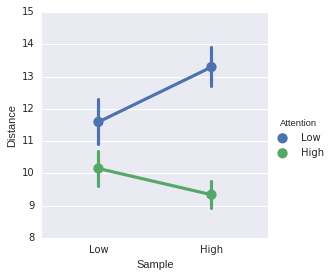

In [86]:
g = sns.factorplot(x="Sample", y="Distance", hue="Attention", data=dat2)

In [88]:
import pandas as pd
dat = pd.DataFrame(columns=['Distance', 'Attention', 'Target'])
beta = 0.15
divsave = []
d = 1
ntrials = 10
stim1 = indiv[1]
stim2 = SD[1]
divsave = []
divsave2 = []
for stim1 in indiv2:
    for stim2 in SD:
        
        mat = np.zeros((ntrials, ntrials))
        for ind in range(ntrials):
            print(ind)
            for ind2 in range(ntrials):

                #print(stim1, t1, stim2, t2)
                scgA = scg2e[stim1][ind]
                scgB = scg2e[stim2][ind2]
        
                scgTot = sc.simplexUnion(scgA, scgB)
                mE = sc.maxEnt(scgTot, d)
        
                D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scgA)
                D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scgB)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
                L1 = sc.laplacian(D1, d)
                L2 = sc.laplacian(D2, d)
        
                rho1 = sc.densityMatrix(L1, beta)
                rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
                div = sc.JSdivergence(rho1, rho2)
                divsave.append([div, t2[stim1], attn[stim2]])
                divsave2.append([1.0/div, t2[stim1], attn[stim2]])
                mat[ind, ind2] = div
        print([stim1, stim2, np.mean(mat)])
   

0
1
2
3
4
5
6
7
8
9
['T3S3D-1', 'T3S3D40', 0.092949625383408355]
0
1
2
3
4
5
6
7
8
9
['T3S3D-1', 'T40S40D3', 0.11509679768348895]
0
1
2
3
4
5
6
7
8
9
['T40S40D-1', 'T3S3D40', 0.08276646833023292]
0
1
2
3
4
5
6
7
8
9
['T40S40D-1', 'T40S40D3', 0.1144886984841338]
